# CA2-Economic and Social Challenges In Irish Pub´s Industries
#### Eliana Hincapié

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

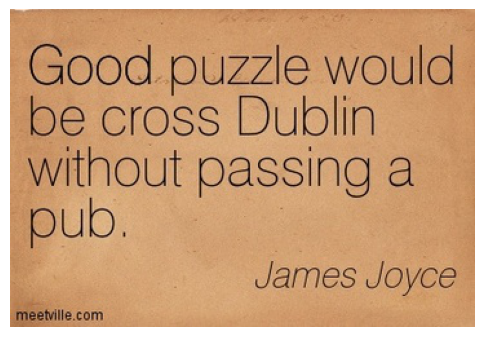

In [2]:
%matplotlib inline

# Load the image
img=mpimg.imread('Good_Puzzle.jpeg')
plt.figure(figsize=(6, 12))
plt.axis('off')
plt.imshow(img)

### Understanding the Data

##### Dataset 'Alcohol Consumption 2015_2024'

In [3]:
# Importing the first dataset
Consumption_df = pd.read_csv('Alcohol Consumption 2015_2024.csv')

In [4]:
# looking at the dataset
Consumption_df.head()

,Statistic Label,Year,Sex,Age Group,UNIT,VALUE
0,Persons who drink more than once per week,2015,Both sexes,All ages,%,24.2
1,Persons who drink more than once per week,2015,Both sexes,15 - 19 years,%,5.3
2,Persons who drink more than once per week,2015,Both sexes,20 - 24 years,%,22.3
3,Persons who drink more than once per week,2015,Both sexes,25 - 29 years,%,19.7
4,Persons who drink more than once per week,2015,Both sexes,30 - 34 years,%,21.1


In [5]:
# dimensionality of the dataset
Consumption_df.shape

(1680, 6)

In [6]:
# Descriptive statistics
Consumption_df.describe()

,Year,VALUE
count,1680.000000,1680.000000
mean,2019.500000,19.996131
std,3.202515,7.626196
min,2015.000000,1.900000
25%,2016.750000,15.100000
50%,2019.500000,19.000000
75%,2022.250000,24.000000
max,2024.000000,58.600000


In [7]:
# Descriptive statistics incluiding objects
Consumption_df.describe(include=object)

,Statistic Label,Sex,Age Group,UNIT
count,1680,1680,1680,1680
unique,5,3,14,1
top,Persons who drink more than once per week,Both sexes,All ages,%
freq,336,560,120,1680


In [8]:
# Print a summary of the dataset
Consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  1680 non-null   object 
 1   Year             1680 non-null   int64  
 2   Sex              1680 non-null   object 
 3   Age Group        1680 non-null   object 
 4   UNIT             1680 non-null   object 
 5   VALUE            1680 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 78.9+ KB


In [9]:
# Detect missing values
Consumption_df.isnull().sum()

Statistic Label    0
Year               0
Sex                0
Age Group          0
UNIT               0
VALUE              0
dtype: int64

Check for Data Distributions

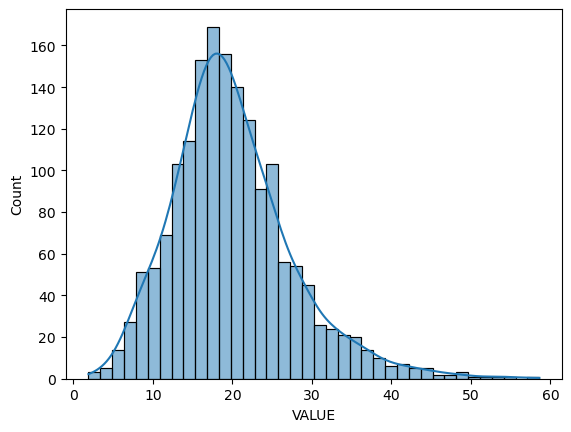

In [10]:
# Visualize Distributions
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(Consumption_df['VALUE'], kde=True)
plt.show()

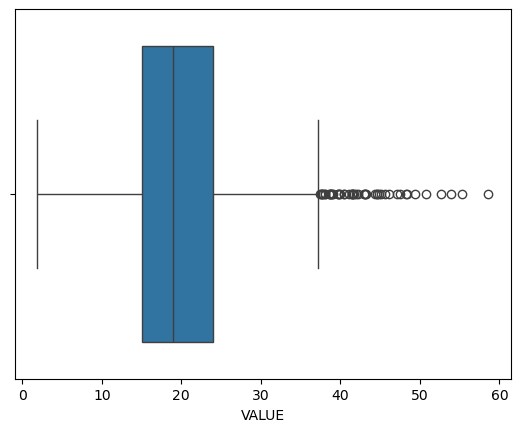

In [11]:
# Check for outliers
sns.boxplot(x=Consumption_df['VALUE'])
plt.show()

### Data Preparation

In [12]:
# Check for unexpected values
Consumption_df['Statistic Label'].unique()

array(['Persons who drink more than once per week',
       'Persons who drink only once per week',
       'Persons who drink 1 to 3 times per month',
       'Persons who have not drank in a month or longer',
       'Persons who have never drank or have only had a few sips'],
      dtype=object)

In [13]:
# Check for unexpected values
Consumption_df['Age Group'].unique()

array(['All ages', '15 - 19 years', '20 - 24 years', '25 - 29 years',
       '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years',
       '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years',
       '70 - 74 years', '75 years and over'], dtype=object)

##### Handle Non-Numeric Data

In [14]:
# Label encoding 'Statistic Label'
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Consumption_df['Statistic Label'] = encoder.fit_transform(Consumption_df['Statistic Label'])

In [15]:
# View the mapping 'Statistic Label'
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Mapping of categories to numbers:")
print(mapping)

Mapping of categories to numbers:
{'Persons who drink 1 to 3 times per month': 0, 'Persons who drink more than once per week': 1, 'Persons who drink only once per week': 2, 'Persons who have never drank or have only had a few sips': 3, 'Persons who have not drank in a month or longer': 4}


In [16]:
# Label encoding 'Age Group'
encoder = LabelEncoder()
Consumption_df['Age Group'] = encoder.fit_transform(Consumption_df['Age Group'])

In [17]:
# View the mapping 'Age Group'
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Mapping of categories to numbers:")
print(mapping)

Mapping of categories to numbers:
{'15 - 19 years': 0, '20 - 24 years': 1, '25 - 29 years': 2, '30 - 34 years': 3, '35 - 39 years': 4, '40 - 44 years': 5, '45 - 49 years': 6, '50 - 54 years': 7, '55 - 59 years': 8, '60 - 64 years': 9, '65 - 69 years': 10, '70 - 74 years': 11, '75 years and over': 12, 'All ages': 13}


In [18]:
Consumption_df.head()

,Statistic Label,Year,Sex,Age Group,UNIT,VALUE
0,1,2015,Both sexes,13,%,24.2
1,1,2015,Both sexes,0,%,5.3
2,1,2015,Both sexes,1,%,22.3
3,1,2015,Both sexes,2,%,19.7
4,1,2015,Both sexes,3,%,21.1


In [19]:
Consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  1680 non-null   int32  
 1   Year             1680 non-null   int64  
 2   Sex              1680 non-null   object 
 3   Age Group        1680 non-null   int32  
 4   UNIT             1680 non-null   object 
 5   VALUE            1680 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 65.8+ KB


In [20]:
# Drop text columns
Consumption_df = Consumption_df.select_dtypes(include=['float64', 'int64', 'int32'])

In [21]:
Consumption_df.head()

,Statistic Label,Year,Age Group,VALUE
0,1,2015,13,24.2
1,1,2015,0,5.3
2,1,2015,1,22.3
3,1,2015,2,19.7
4,1,2015,3,21.1


In [22]:
# Change column name
Consumption_df.rename(columns={'VALUE': 'Percentage of people'}, inplace=True)

In [23]:
Consumption_df.head()

,Statistic Label,Year,Age Group,Percentage of people
0,1,2015,13,24.2
1,1,2015,0,5.3
2,1,2015,1,22.3
3,1,2015,2,19.7
4,1,2015,3,21.1


In [24]:
# Calculate Correlation Matrix
correlation_matrix = Consumption_df.corr()
print(correlation_matrix)

                      Statistic Label          Year     Age Group  \
Statistic Label          1.000000e+00  6.120011e-14  9.171609e-17   
Year                     6.120011e-14  1.000000e+00  1.081613e-15   
Age Group                9.171609e-17  1.081613e-15  1.000000e+00   
Percentage of people    -3.850714e-02  8.065846e-03  9.422544e-04   

                      Percentage of people  
Statistic Label                  -0.038507  
Year                              0.008066  
Age Group                         0.000942  
Percentage of people              1.000000  


### Model Selection and Training

In [25]:
# Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# Prepare the data, select features and target
X = Consumption_df[['Year', 'Age Group']]
y = Consumption_df['Percentage of people']

In [27]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -114.6047124858723
Coefficients: [0.06661991 0.00738952]


The Coefficients values shows us that for every additional year, the percentage of people increases by approximately 0.067%, holding Age constant and for every additional year in age, the percentage of people increases by approximately 0.0074%, holding Year constant.

In [30]:
# Test the model. Make predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 5.687830680925118
Mean Squared Error (MSE): 60.80945256545937
R² Score: -0.004762100277004411


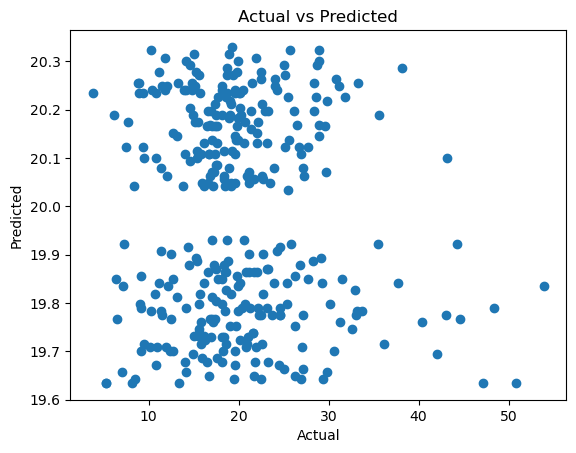

In [32]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

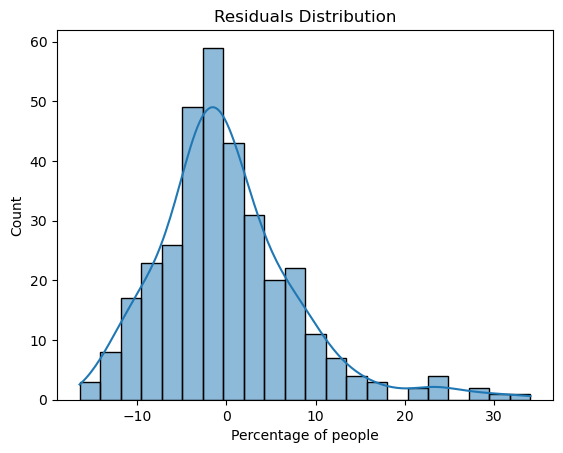

In [33]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()